In [1]:
import datacube
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2018-01-01', '2018-12-31'),
 'lat': (-35.34401158226577, -35.32289341773423),
 'lon': (149.13522660956212, 149.15636005710457),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 36, x: 90, y: 104)
Coordinates:
  * time             (time) datetime64[ns] 2018-01-01T23:56:37 ...
  * y                (y) float64 -3.962e+06 -3.962e+06 -3.962e+06 -3.962e+06 ...
  * x                (x) float64 1.55e+06 1.55e+06 1.55e+06 1.55e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 243 358 408 500 565 429 290 302 305 ...
    blue             (time, y, x) int16 226 368 421 518 578 432 287 298 304 ...
    green            (time, y, x) int16 445 607 658 752 794 626 486 523 517 ...
    red              (time, y, x) int16 386 653 780 990 1000 680 471 535 535 ...
    nir              (time, y, x) int16 2943 2901 2878 2763 2461 2364 2556 ...
    swir1            (time, y, x) int16 1750 2277 2447 2761 2506 1879 1851 ...
    swir2            (time, y, x) int16 1081 1595 1789 2098 1892 1206 1029 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
spee.hist(ax=axes)

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1167a58e80>,
      dtype=object)

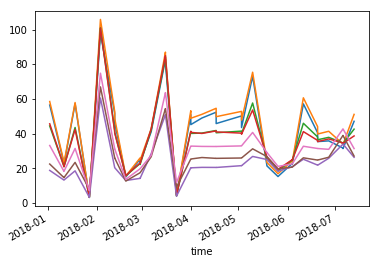

In [5]:
spee.plot(legend=False)


In [6]:
#query={'time': ('2018-02-05', '2018-02-15'),
# 'lat': (-30.595141582265763, -30.573900084400902),
# 'lon': (115.14502132590322, 115.16618234076345),
# 'output_crs': 'EPSG:3577',
# 'resampling': 'bilinear',
# 'resolution': (-25.0, 25.0)}
#sat_array2 = dc.load(product='ls8_nbar_scene', **query)
#sat_array2.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
#sat_array2

In [7]:
import DEAPlotting
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [8]:
query={'time': ('2017-01-01', '2017-12-31'),
 'lat': (-35.34401158226577, -35.32289341773423),
 'lon': (149.13522660956212, 149.15636005710457),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
data = dc.load(product='ls8_nbart_geomedian_annual', **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 90, y: 104)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01
  * y        (y) float64 -3.962e+06 -3.962e+06 -3.962e+06 -3.962e+06 ...
  * x        (x) float64 1.55e+06 1.55e+06 1.55e+06 1.55e+06 1.55e+06 ...
Data variables:
    blue     (time, y, x) int16 358 434 533 620 520 354 342 342 353 276 333 ...
    green    (time, y, x) int16 568 635 760 884 754 528 561 561 570 449 497 ...
    red      (time, y, x) int16 659 745 992 1140 890 550 608 608 596 435 527 ...
    nir      (time, y, x) int16 2124 2368 2408 2522 2496 2212 3089 3089 2959 ...
    swir1    (time, y, x) int16 1892 2235 2702 2794 2147 1648 2181 2181 2029 ...
    swir2    (time, y, x) int16 1355 1704 2153 2227 1564 993 1218 1218 1143 ...
Attributes:
    crs:      EPSG:3577

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f115dec0080>)

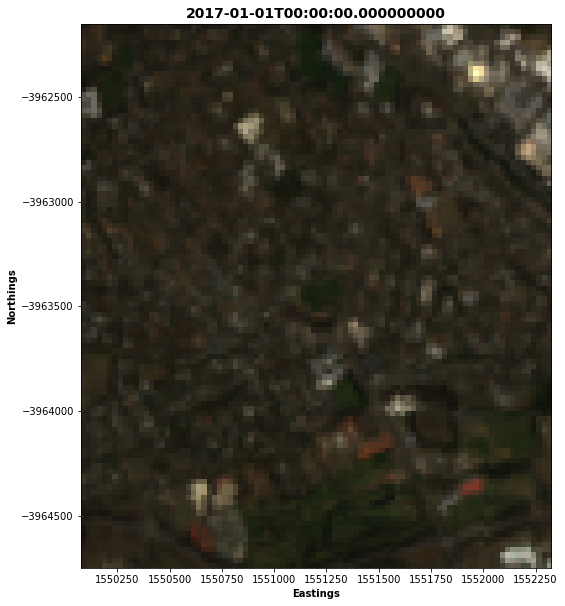

In [9]:
DEAPlotting.three_band_image(data, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [10]:
del sat_array['coastal_aerosol']

In [11]:
norm_diffo = 100*(sat_array - data.squeeze(dim='time'))/data.squeeze(dim='time')
diffo = sat_array - data.squeeze(dim='time')

In [12]:
diffo

<xarray.Dataset>
Dimensions:  (time: 36, x: 90, y: 104)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T23:56:37 ...
  * y        (y) float64 -3.962e+06 -3.962e+06 -3.962e+06 -3.962e+06 ...
  * x        (x) float64 1.55e+06 1.55e+06 1.55e+06 1.55e+06 1.55e+06 ...
Data variables:
    blue     (time, y, x) int16 -132 -66 -112 -102 58 78 -55 -44 -49 19 43 ...
    green    (time, y, x) int16 -123 -28 -102 -132 40 98 -75 -38 -53 27 61 ...
    red      (time, y, x) int16 -273 -92 -212 -150 110 130 -137 -73 -61 51 ...
    nir      (time, y, x) int16 819 533 470 241 -35 152 -533 -405 -377 52 14 ...
    swir1    (time, y, x) int16 -142 42 -255 -33 359 231 -330 -92 -46 149 ...
    swir2    (time, y, x) int16 -274 -109 -364 -129 328 213 -189 -43 -19 74 ...

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

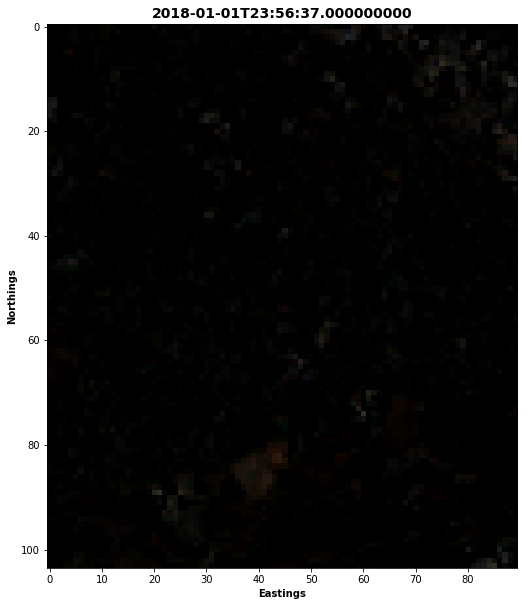

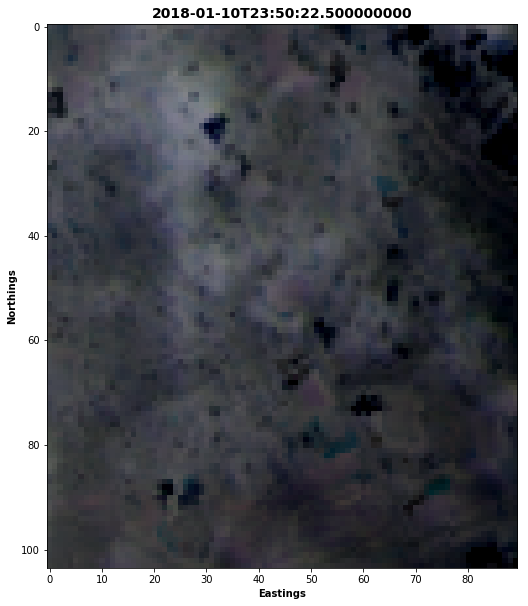

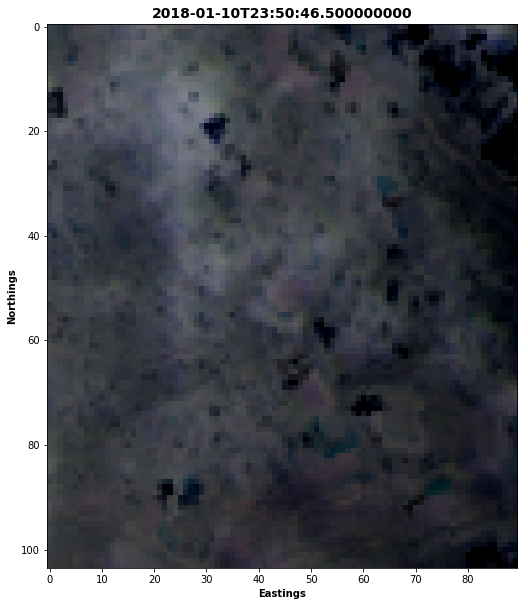

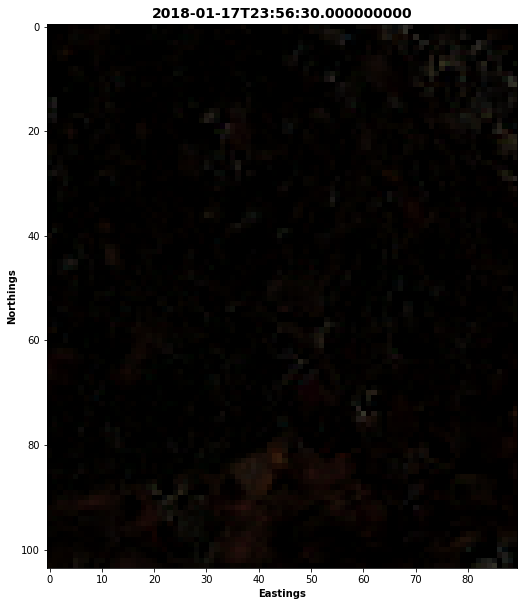

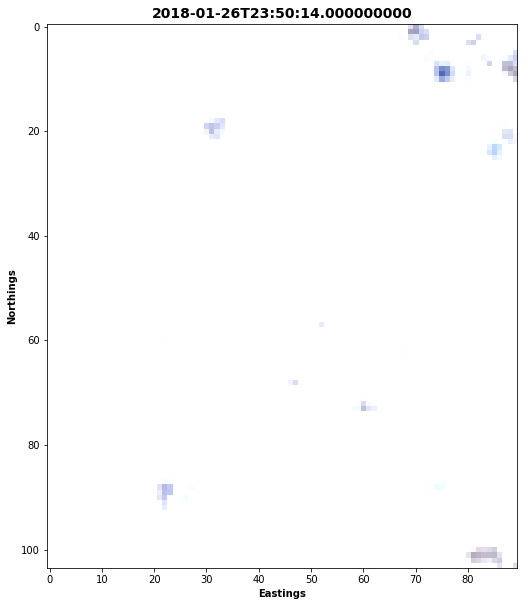

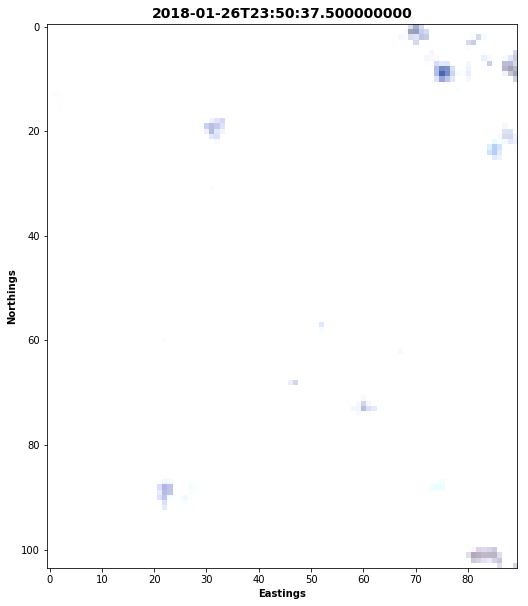

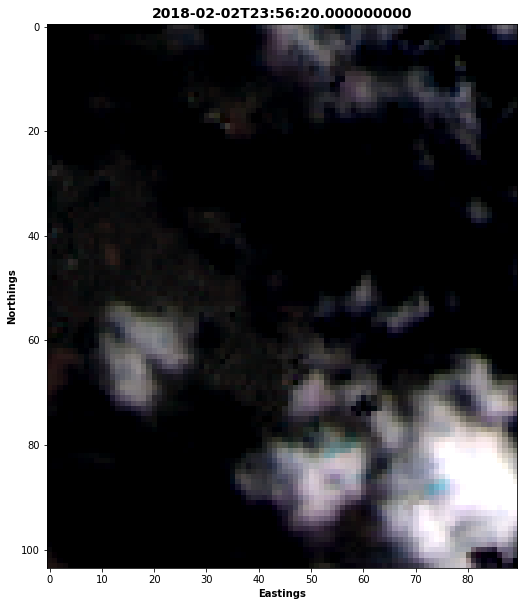

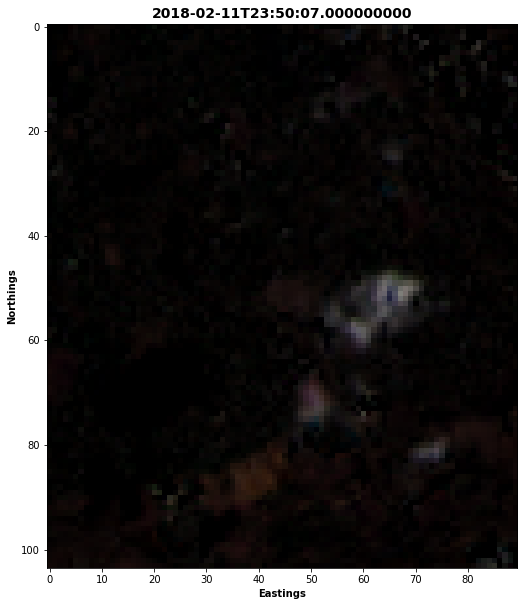

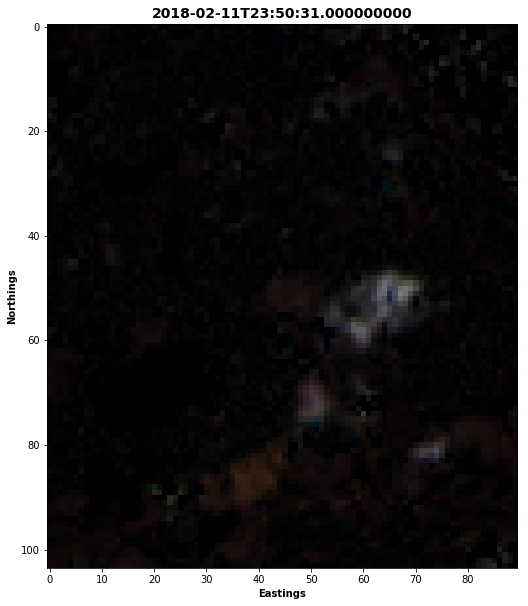

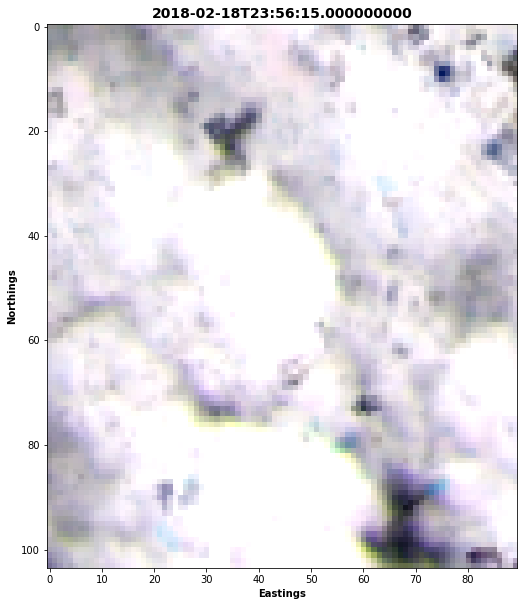

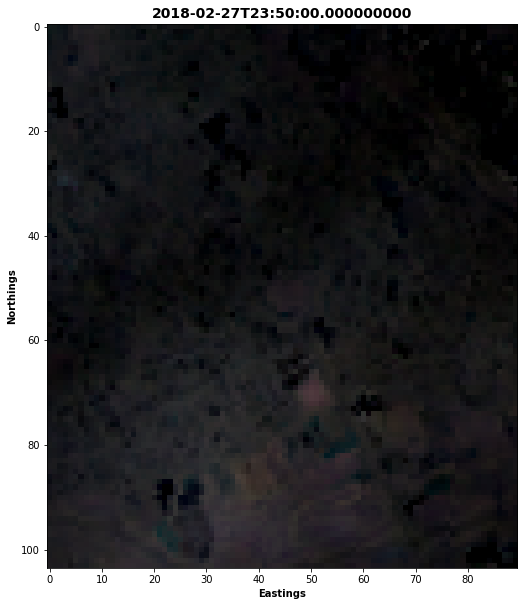

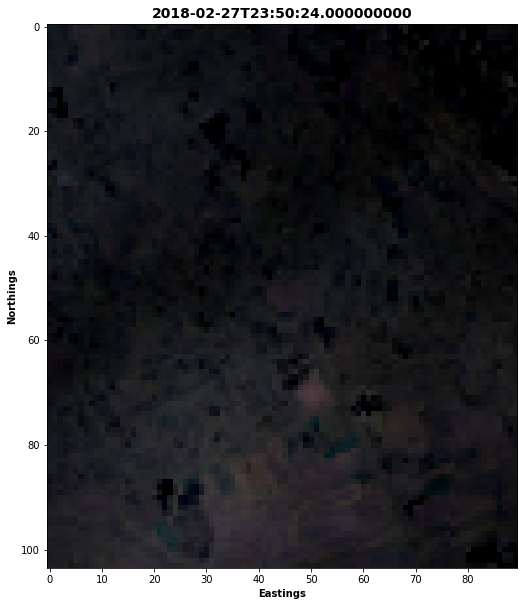

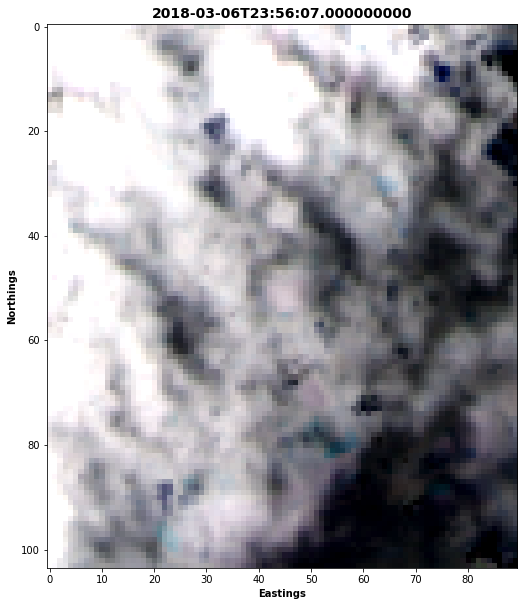

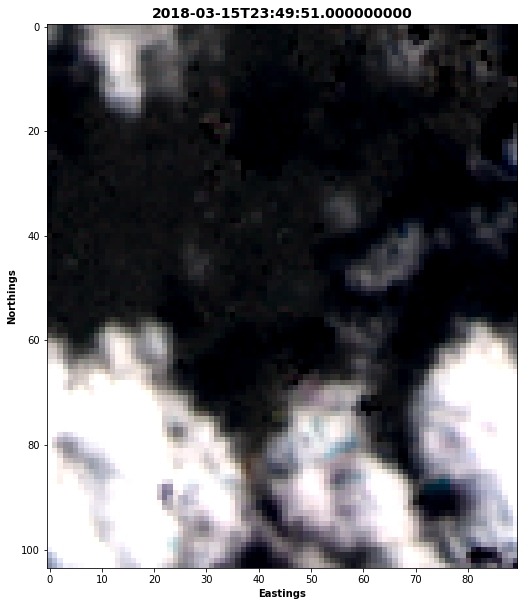

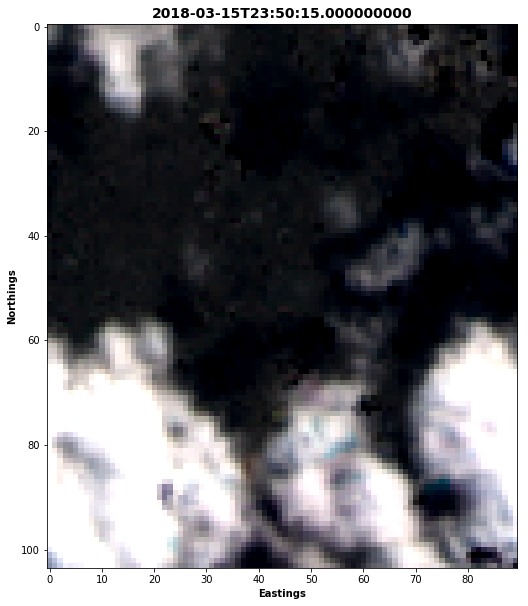

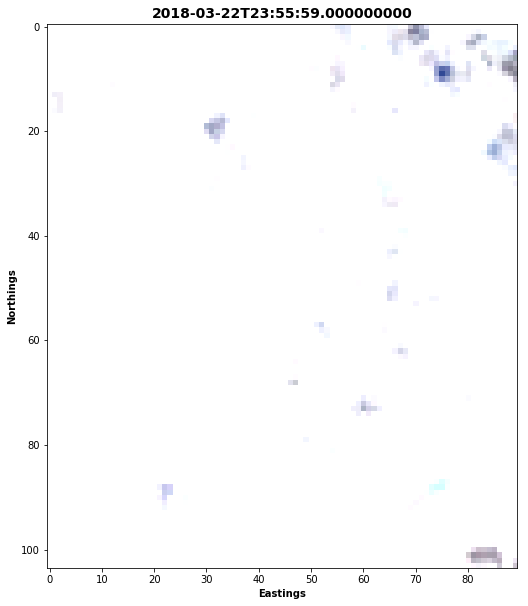

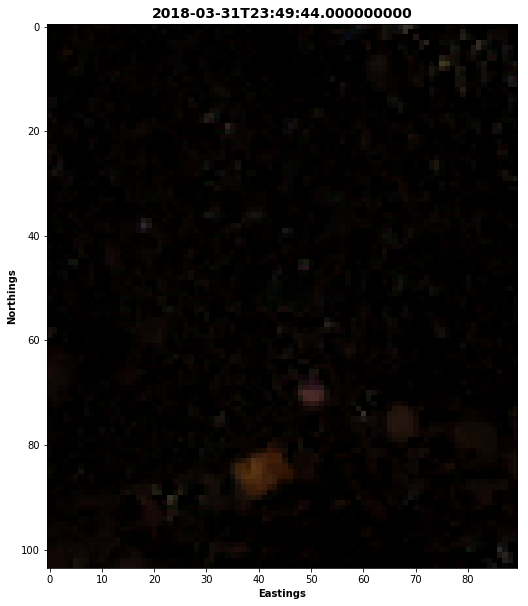

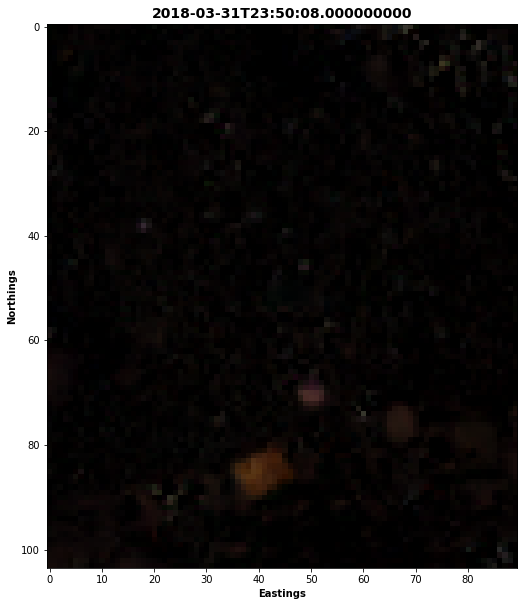

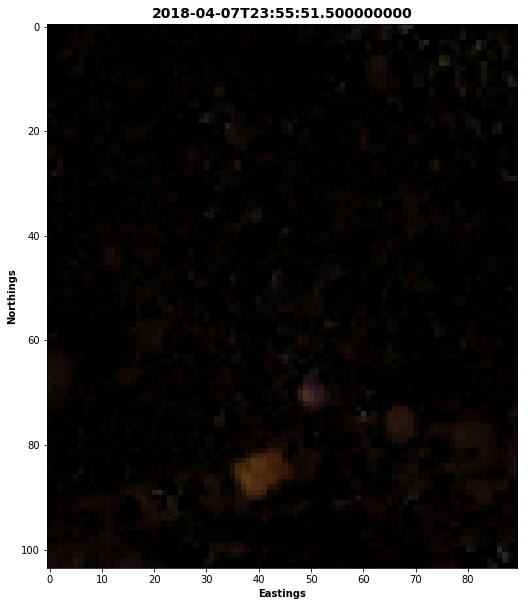

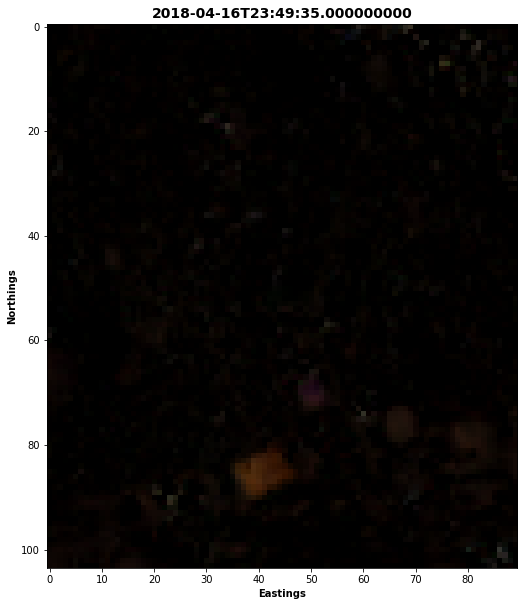

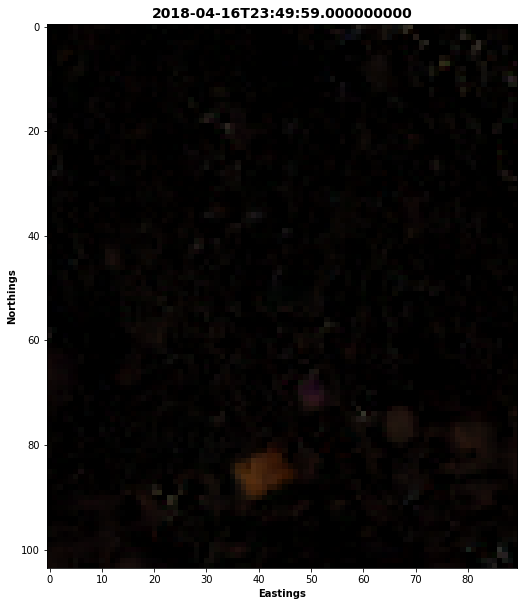

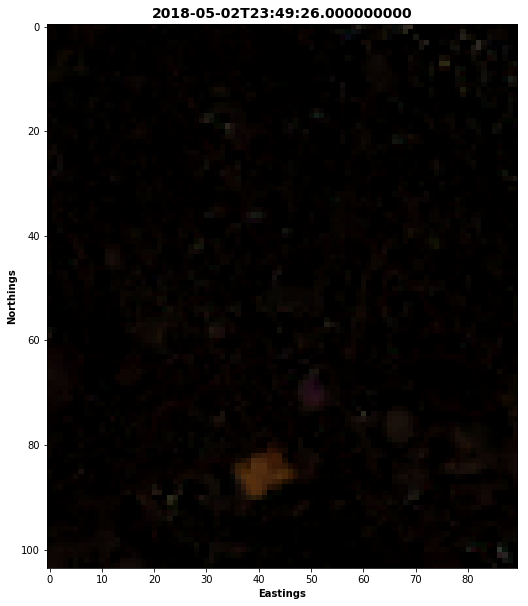

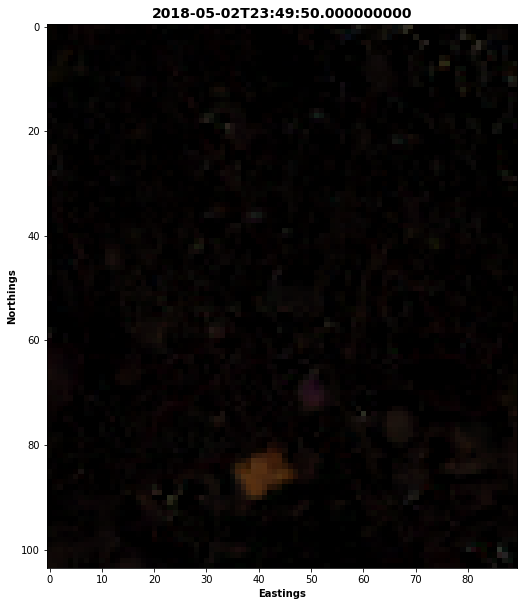

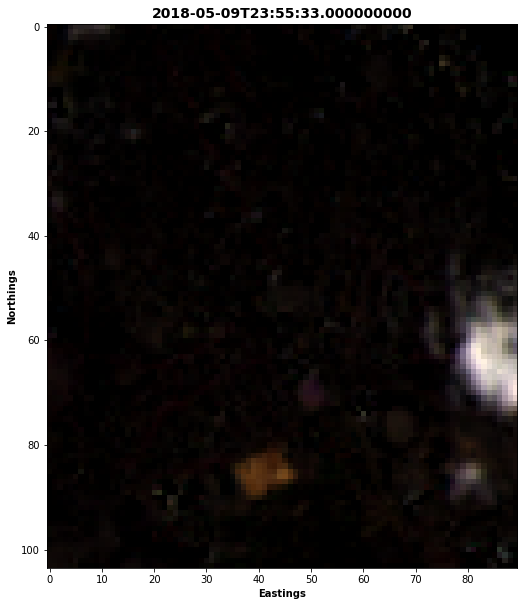

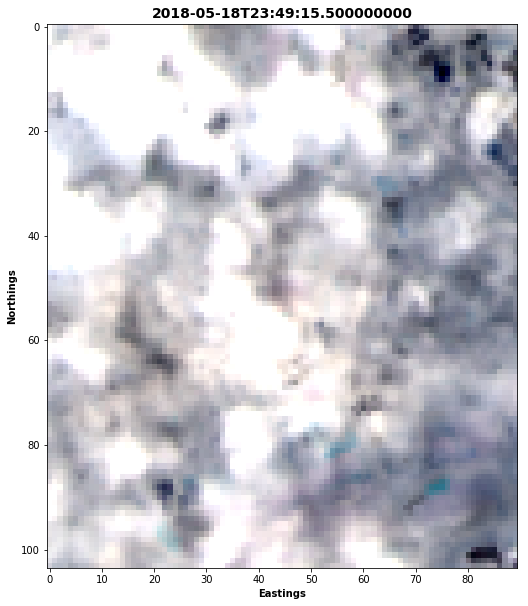

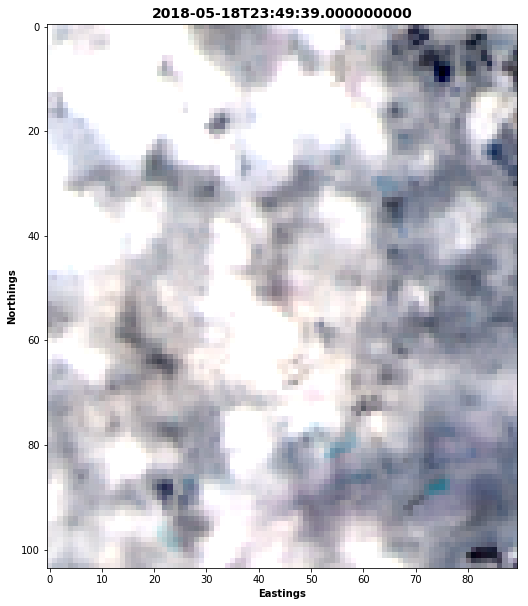

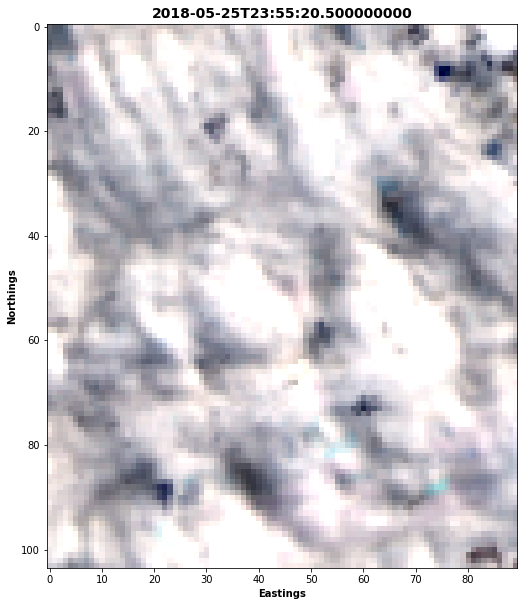

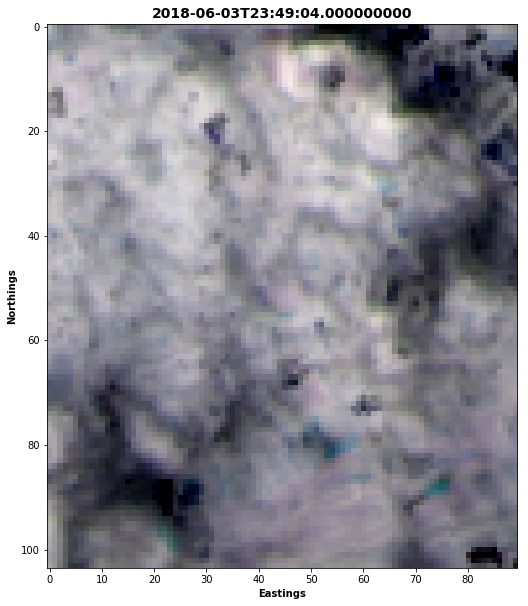

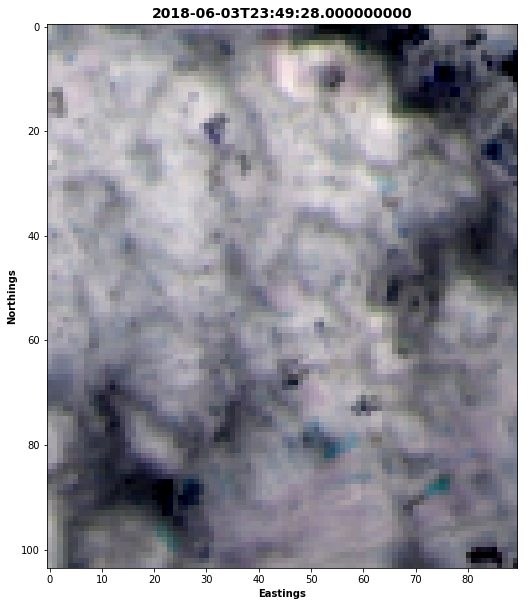

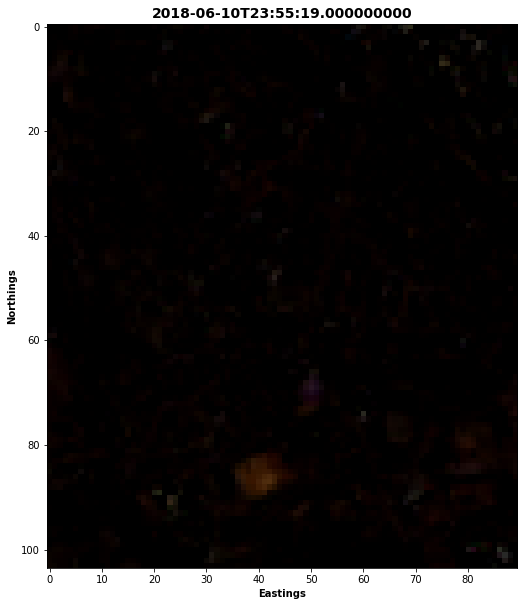

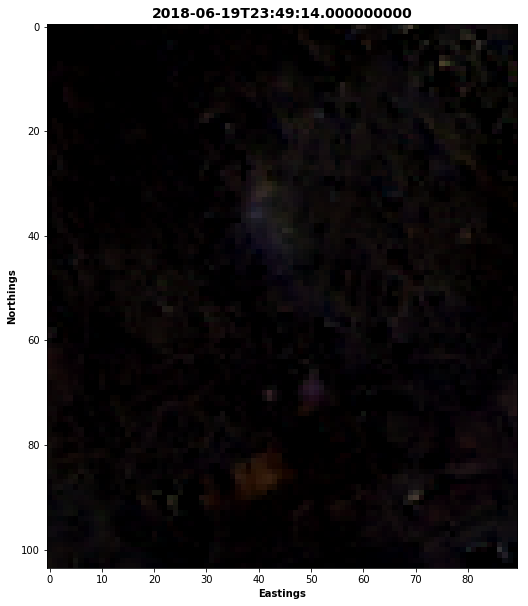

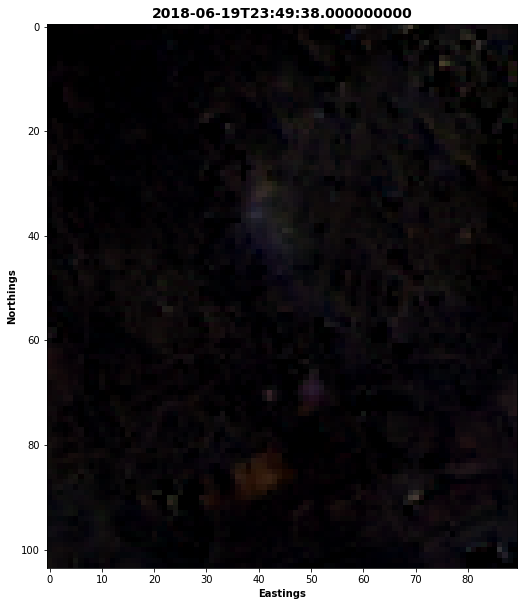

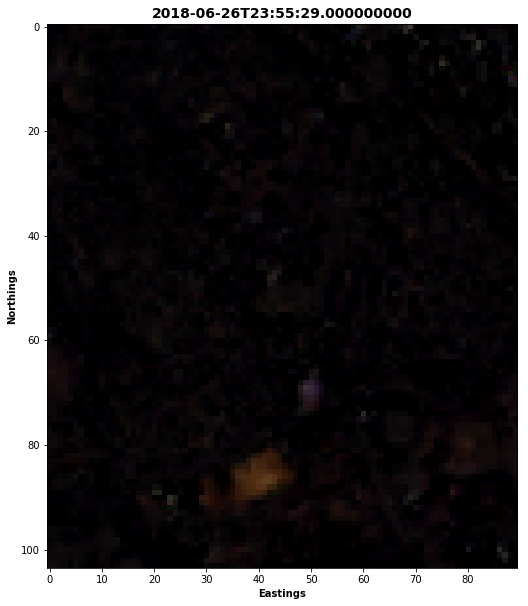

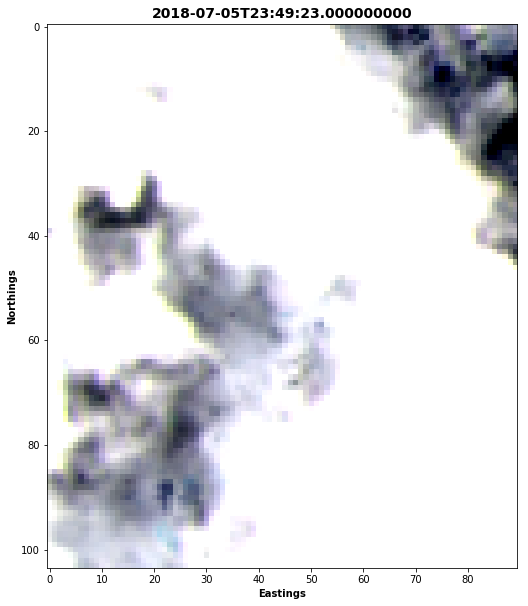

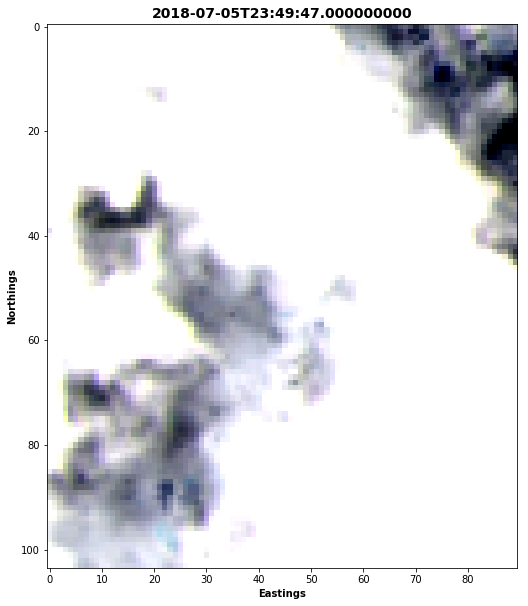

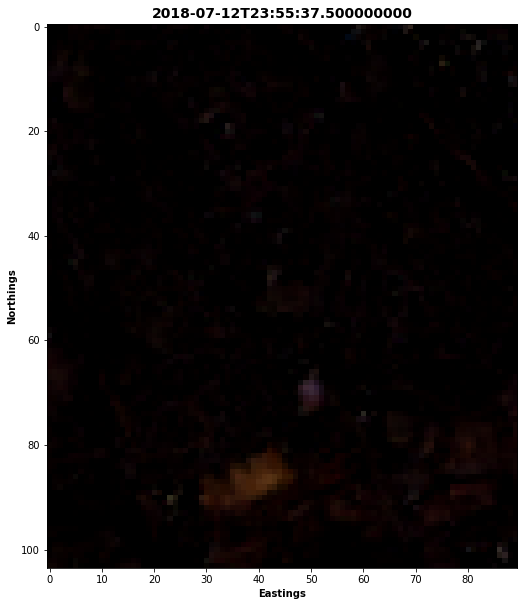

In [13]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)
